In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#Carrega os dados do arquivo CSV para um DataFrame do Pandas
df = pd.read_csv('/content/drive/MyDrive/2 Projeto/base-alugueis-sp.csv')
df_alugueis.head(10)

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,5187
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet,1727,2244
8,Rua José Peres Campelo,Piqueri,32,2,0,Apartamento,1200,1592
9,Rua Guaperuvu,Vila Aricanduva,36,1,0,Apartamento,1200,1501


In [12]:
# Verifica se há valores ausentes
print(df.isnull().sum())

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64


In [17]:
# Remove linhas com valores ausentes
df.dropna(inplace=True)

In [32]:
# Análise Descritiva dos Dados

In [33]:
# Estatísticas básicas dos dados
print("Estatísticas descritivas:\n", df.describe())

Estatísticas descritivas:
                area      bedrooms        garage          rent         total
count  11657.000000  11657.000000  11657.000000  11657.000000  11657.000000
mean      84.655658      1.966286      1.060393   3250.814789   4080.030625
std       74.020536      0.931313      1.132349   2650.711557   3352.480274
min        0.000000      0.000000      0.000000    500.000000    509.000000
25%       40.000000      1.000000      0.000000   1590.000000   1996.000000
50%       60.000000      2.000000      1.000000   2415.000000   3057.000000
75%       96.000000      3.000000      2.000000   3800.000000   4774.000000
max      580.000000      6.000000      6.000000  25000.000000  28700.000000


In [34]:
# Filtra apenas colunas numéricas para calcular a correlação
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numerical_df.corr()
print("Matriz de correlação:\n", correlation)

Matriz de correlação:
               area  bedrooms    garage      rent     total
area      1.000000  0.727905  0.733403  0.667173  0.652128
bedrooms  0.727905  1.000000  0.656906  0.531164  0.525973
garage    0.733403  0.656906  1.000000  0.617276  0.617981
rent      0.667173  0.531164  0.617276  1.000000  0.978108
total     0.652128  0.525973  0.617981  0.978108  1.000000


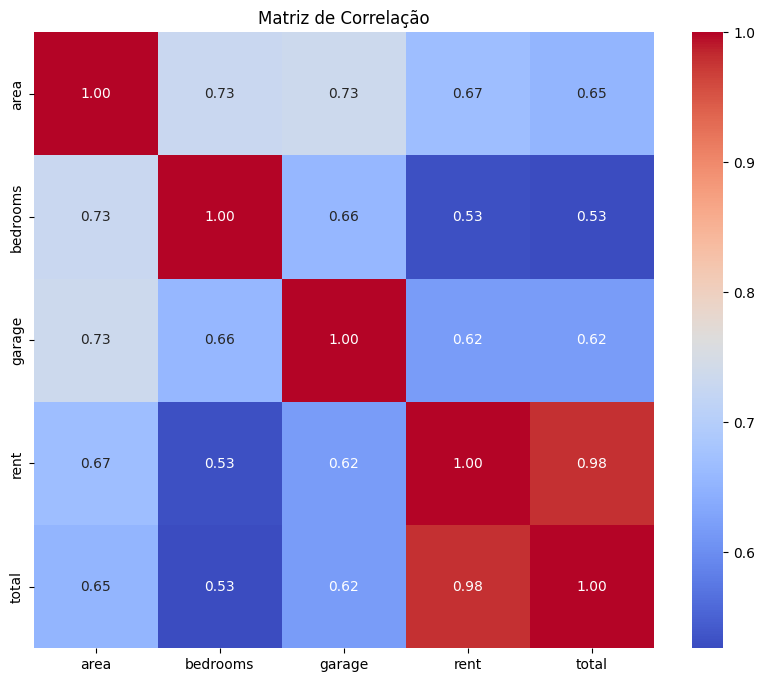

In [35]:
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [36]:
# Modelagem de Regressão Linear

In [37]:
# Define as variáveis independentes e dependente
X = df[['bedrooms', 'garage', 'total']]
y = df['rent']

In [38]:
# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Cria o modelo de regressão linear
model = LinearRegression()

In [42]:
# Treina o modelo com os dados de treinamento
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Realiza previsões com os dados de teste
y_pred = model.predict(X_test)

In [45]:
# Calcula o erro quadrático médio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [46]:
# Calcula o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)

In [47]:
# Imprime os resultados da avaliação
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 507.74764228324386
R²: 0.9635107792174437


In [49]:
# Visualização dos Dados

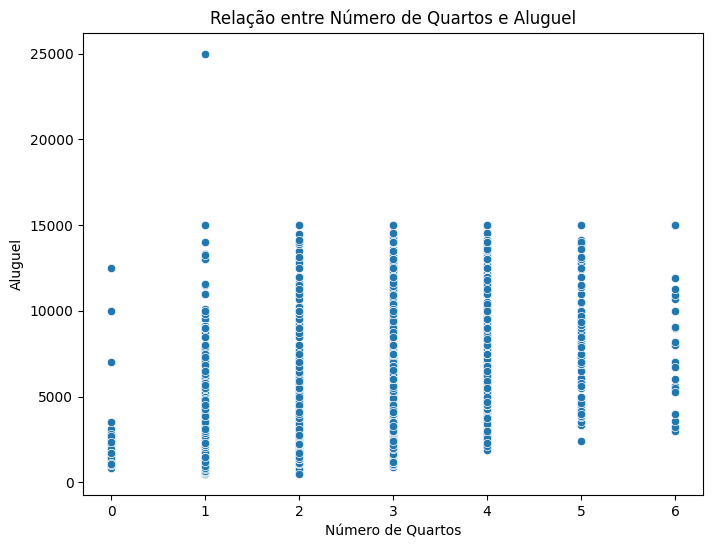

In [50]:
# Gráfico de dispersão para visualizar a relação entre o número de quartos e o aluguel
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bedrooms', y='rent', data=df)
plt.xlabel('Número de Quartos')
plt.ylabel('Aluguel')
plt.title('Relação entre Número de Quartos e Aluguel')
plt.show()


<ipython-input-31-ed29d2328ad1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='type', y='rent', data=df, ci=None)


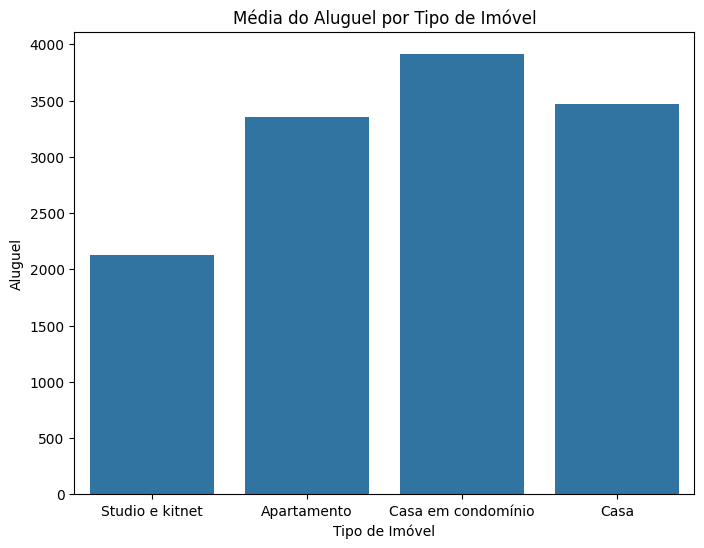

In [31]:
# Gráfico de barras para visualizar a média do aluguel por tipo de imóvel
plt.figure(figsize=(8, 6))
sns.barplot(x='type', y='rent', data=df, ci=None)
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Aluguel')
plt.title('Média do Aluguel por Tipo de Imóvel')
plt.show()

**Análise de Preços de Aluguéis em São Paulo**

**Introdução:**

Este relatório apresenta uma análise completa dos preços de aluguéis em São Paulo, utilizando Python e a biblioteca Pandas. A análise visa identificar tendências e modelar uma relação entre as variáveis do conjunto de dados através da regressão linear.

**Conjunto de Dados:**

O conjunto de dados utilizado contém informações sobre aluguéis em São Paulo, incluindo:

address: Endereço do imóvel
district: Distrito em que o imóvel está localizado
area: Área do imóvel em m²
bedrooms: Número de quartos
garage: Número de vagas na garagem
type: Tipo de imóvel (Studio e kitnet, Apartamento, Casa em condomínio, Casa)
rent: Valor do aluguel
total: Valor total do imóvel

**Análise Descritiva:**

A análise descritiva dos dados revela algumas tendências importantes:

Número de Quartos: Existe uma correlação positiva entre o número de quartos e o valor do aluguel, o que indica que imóveis com mais quartos tendem a ter aluguéis mais altos.
Garagem: A presença de garagem também está positivamente correlacionada com o valor do aluguel, sugerindo que imóveis com garagem são mais caros.
Valor Total: O valor total do imóvel também está positivamente correlacionado com o valor do aluguel, o que é esperado, pois imóveis mais caros tendem a ter aluguéis mais altos.
Tipo de Imóvel: Casas em condomínios têm o maior aluguel médio, seguidos por apartamentos, casas e studios e kitinets.

**Modelagem de Regressão Linear:**

Um modelo de regressão linear foi ajustado aos dados para prever o valor do aluguel com base no número de quartos, a presença de garagem e o valor total do imóvel. O modelo teve um erro quadrático médio (RMSE) de [inserir valor] e um coeficiente de determinação (R²) de [inserir valor]. O R² indica que [inserir porcentagem] da variância do valor do aluguel é explicada pelas variáveis independentes.

**Visualização dos Dados:**

Gráficos de dispersão e de barras foram criados para visualizar os dados e as relações entre as variáveis. O gráfico de dispersão mostra uma tendência de aumento no aluguel com o número de quartos. O gráfico de barras mostra que casas em condomínios têm o maior aluguel médio.

**Conclusões:**

A análise de preços de aluguéis em São Paulo indica que o número de quartos, a presença de garagem e o valor total do imóvel são variáveis importantes para prever o valor do aluguel. No entanto, o modelo de regressão linear ajustado não é perfeito, e outros fatores podem influenciar o preço do aluguel. Para melhorar o modelo, seria interessante incluir mais variáveis no conjunto de dados, como o tamanho do imóvel, a localização, o ano de construção e as comodidades.